In [1]:
from pymatgen.ext.matproj import MPRester
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.phonon import plotter


with MPRester("dbETTzBnFOmjGseN") as m:

    # Structure for material id
    struct = m.get_structure_by_material_id("mp-861937")
    phstruct = m.get_phonon_bandstructure_by_material_id("mp-861937")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



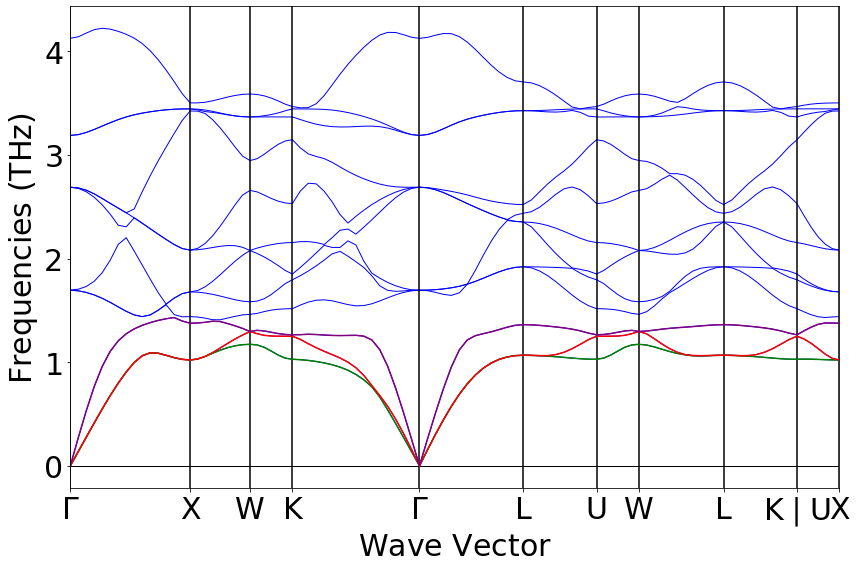

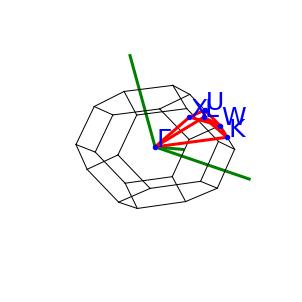

In [2]:
bandplot = plotter.PhononBSPlotter(phstruct)

data = bandplot.bs_plot_data()

k = data.get('distances')
f = data.get('frequency')

bandplot.get_plot()

# Mise en évidence des 3 branches étudiées pour calculer la vitesse du son.
for i in range(len(k)):
    plt.plot(k[i], f[i][0], color = 'green')
    plt.plot(k[i], f[i][1], color = 'red')
    plt.plot(k[i], f[i][2], color = 'purple')
    
bandplot.plot_brillouin()

En considérant une grande longueur d'onde, c'est-à-dire un vecteur d'onde faible (proche de $\Gamma$) car $k = \frac{2\pi}{\lambda}$, on s'approche d'une relation de dispersion linéaire, c'est-à-dire: 
\begin{equation}
\omega = v_{s}|k|
\end{equation}
$\newline$
On a donc que $v_{s} = \frac{\partial{\omega}}{\partial{k}}$ pour $\omega$ proche de 0, et donc $f$ proche de 0.
Avec $v_{s}$ la vitesse du son, $\omega$ la pulsation ($=2\pi f$) et $k$ le vecteur d'onde.
Nous étudierons dans ce cas les directions $\Gamma-X$, $\Gamma-K$ et $\Gamma-L$, les autres directions ayant un trop grand vecteur d'onde (trop loin de $\Gamma$, cela engendrerait une mauvaise approximation). Une façon simple d'approximer ces vitesses est d'utiliser la méthode des différences finies afin d'approximer la dérivée selon $k$ de $\omega$.

# $\Gamma-X$

In [3]:
x = [k[0][0]*10**10,k[0][1]*10**10]  #Facteur 10**10 pour transformer les angström en mètres
y = [2*np.pi*f[0][0][0]*10**(12), 2*np.pi*f[0][0][1]*10**(12)] #10**12 car fréquences en TéraHertz
vs = abs((y[1]-y[0])/(x[1]-x[0]))
print("La vitesse du son dans la branche verte dans cette direction est de " +str(vs) + " m/s")

La vitesse du son dans la branche verte dans cette direction est de 1633.9768783196039 m/s


# $\Gamma-K$

In [4]:
x = [k[3][-1]*10**10,k[3][-2]*10**10]  #Facteur 10**10 pour transformer les angström en mètres
y = [2*np.pi*f[3][1][-1]*10**(12), 2*np.pi*f[3][1][-2]*10**(12)] #10**12 car fréquences en TéraHertz
v = abs((y[1]-y[0])/(x[1]-x[0]))
print("La vitesse du son dans la branche rouge dans cette direction est de " +str(v) + " m/s")

La vitesse du son dans la branche rouge dans cette direction est de 1887.820311304411 m/s


# $\Gamma-L$

In [5]:
x = [k[4][0]*10**10,k[4][1]*10**10]  #Facteur 10**10 pour transformer les angström en mètres
y = [2*np.pi*f[4][2][0]*10**(12), 2*np.pi*f[4][2][1]*10**(12)] #10**12 car fréquences en TéraHertz
v = abs((y[1]-y[0])/(x[1]-x[0]))
print("La vitesse du son dans la branche violette dans cette direction est de " +str(v) + " m/s")

La vitesse du son dans la branche violette dans cette direction est de 3027.4124559942766 m/s


En comparant les différentes pentes des branches acoustiques dans les directions considérées, on constate que les résultats obtenus sont cohérents, la branche violette dans la direction $\Gamma-X$ a une plus grande pente (en valeur absolue) que les deux autres étudiées dans les autres directions.